In [7]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


from keras.callbacks import TensorBoard


%matplotlib inline

In [8]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

X_train = X_train.reshape((1488, 225, 300, 1))
X_test = X_test.reshape((450, 225, 300, 1))

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1488
number of test examples = 450
X_train shape: (1488, 225, 300, 1)
Y_train shape: (1488, 1)
X_test shape: (450, 225, 300, 1)
Y_test shape: (450, 1)


In [9]:

def HappyModel(input_shape):

    X_input = Input(shape=input_shape)
    X = ZeroPadding2D(padding=(1, 1))(X_input)
    X = Conv2D(8, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    X = ZeroPadding2D(padding=(1, 1))(X)
    X = Conv2D(16, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    X = ZeroPadding2D(padding=(1, 1))(X)
    X = Conv2D(32, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    # FC
    X = Flatten()(X)
    Y = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs = X_input, outputs = Y, name='HappyModel')

    
    return model

In [10]:
happyModel = HappyModel((225, 300, 1))

NameError: name 'keras' is not defined

In [14]:

    
import keras
tbCallBack = keras.callbacks.TensorBoard(log_dir='mytensorboard/424_2', histogram_freq=0, write_graph=True, write_images=True)      
happyModel.compile(optimizer=keras.optimizers.Adam(lr=0.0009, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use the retry module or similar alternatives.


In [15]:

happyModel.fit(x=X_train, y=Y_train, batch_size=32, epochs=20,callbacks=[tbCallBack])

Epoch 1/20
1488/1488 [==============================] - 201s 135ms/step - loss: 1.0428 - acc: 0.6317
Epoch 2/20
1488/1488 [==============================] - 200s 134ms/step - loss: 0.4487 - acc: 0.7856
Epoch 3/20
1488/1488 [==============================] - 200s 134ms/step - loss: 0.4915 - acc: 0.7802
Epoch 4/20
1488/1488 [==============================] - 207s 139ms/step - loss: 0.3707 - acc: 0.8219
Epoch 5/20
1488/1488 [==============================] - 206s 138ms/step - loss: 0.2136 - acc: 0.9173
Epoch 6/20
1488/1488 [==============================] - 207s 139ms/step - loss: 0.1716 - acc: 0.9395
Epoch 7/20
1488/1488 [==============================] - 202s 135ms/step - loss: 0.1261 - acc: 0.9651
Epoch 8/20
1488/1488 [==============================] - 207s 139ms/step - loss: 0.0968 - acc: 0.9792
Epoch 9/20
1488/1488 [==============================] - 200s 135ms/step - loss: 0.0623 - acc: 0.9926
Epoch 10/20
1488/1488 [==============================] - 199s 134ms/step - loss: 0.0630 - a

In [16]:
preds = happyModel.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

450/450 [==============================] - 20s 45ms/step

Loss = 0.6408411026000976
Test Accuracy = 0.7911111111111111


[[0.]]
[[0.01335252]]


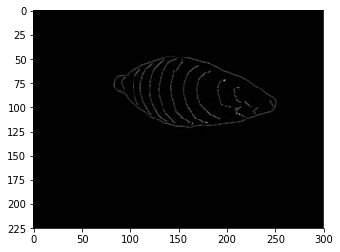

In [17]:
img_path = 'images/cat.19.jpg'

# grayscale=True  添加此参数表示，图片为灰阶图像，维度1。
img = image.load_img(img_path, target_size=(225, 300),grayscale=True)

imshow(img)

x = image.img_to_array(img)

# print("1:" + str(x.shape))

x = np.expand_dims(x, axis=0)


print(happyModel.predict(x))

#加这个可以看到具体的值，这个值的具体含义不是特别清楚
x = x/255
print(happyModel.predict(x))



In [18]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 225, 300, 1)       0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 227, 302, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 225, 300, 8)       80        
_________________________________________________________________
batch_normalization_4 (Batch (None, 225, 300, 8)       32        
_________________________________________________________________
activation_4 (Activation)    (None, 225, 300, 8)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 150, 8)       0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 114, 152, 8)       0         
__________

In [31]:
import osos.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

SyntaxError: invalid syntax (<ipython-input-31-bbc9d3217dd7>, line 2)

In [ ]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))